In [20]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_sheeran = pd.read_csv(r'../dados/ed_sheeran_spotify.csv', sep=',')

In [22]:
df_sheeran.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Magical,Autumn Variations (Fan Living Room Sessions),2023-10-02,1,0V0jxLGonu3pJV6hOl8CSK,spotify:track:0V0jxLGonu3pJV6hOl8CSK,0.748,0.658,0.632,0.000073,0.1690,-8.492,0.0298,135.924,0.464,51,194277
1,1,England,Autumn Variations (Fan Living Room Sessions),2023-10-02,2,4OZoyD5m8Mrc0CMsAxBCU6,spotify:track:4OZoyD5m8Mrc0CMsAxBCU6,0.641,0.622,0.666,0.000086,0.5130,-10.786,0.0423,126.934,0.520,48,226756
2,2,Amazing,Autumn Variations (Fan Living Room Sessions),2023-10-02,3,6rVxvys4tcXsNuw2xoKsLl,spotify:track:6rVxvys4tcXsNuw2xoKsLl,0.429,0.809,0.664,0.000002,0.1310,-7.265,0.0373,116.996,0.374,49,245813
3,3,Plastic Bag,Autumn Variations (Fan Living Room Sessions),2023-10-02,4,11osH1qPIktZAVxjRd8EnW,spotify:track:11osH1qPIktZAVxjRd8EnW,0.621,0.713,0.727,0.000000,0.0751,-6.551,0.0528,120.016,0.384,49,229850
4,4,Blue,Autumn Variations (Fan Living Room Sessions),2023-10-02,5,4MIe9vXY61PuUeFSq1x8rM,spotify:track:4MIe9vXY61PuUeFSq1x8rM,0.888,0.668,0.314,0.000000,0.2220,-8.275,0.0298,78.019,0.414,47,153899


In [23]:
df_sheeran.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [24]:
df_edinho = df_sheeran.drop(['Unnamed: 0', 'id', 'uri'], axis=1)

In [25]:
df_edinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              251 non-null    object 
 1   album             251 non-null    object 
 2   release_date      251 non-null    object 
 3   track_number      251 non-null    int64  
 4   acousticness      251 non-null    float64
 5   danceability      251 non-null    float64
 6   energy            251 non-null    float64
 7   instrumentalness  251 non-null    float64
 8   liveness          251 non-null    float64
 9   loudness          251 non-null    float64
 10  speechiness       251 non-null    float64
 11  tempo             251 non-null    float64
 12  valence           251 non-null    float64
 13  popularity        251 non-null    int64  
 14  duration_ms       251 non-null    int64  
dtypes: float64(9), int64(3), object(3)
memory usage: 29.5+ KB


In [26]:
df_edinho['release_date'] = pd.to_datetime(df_edinho['release_date'], format='%Y-%m-%d')

In [27]:
df_edinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              251 non-null    object        
 1   album             251 non-null    object        
 2   release_date      251 non-null    datetime64[ns]
 3   track_number      251 non-null    int64         
 4   acousticness      251 non-null    float64       
 5   danceability      251 non-null    float64       
 6   energy            251 non-null    float64       
 7   instrumentalness  251 non-null    float64       
 8   liveness          251 non-null    float64       
 9   loudness          251 non-null    float64       
 10  speechiness       251 non-null    float64       
 11  tempo             251 non-null    float64       
 12  valence           251 non-null    float64       
 13  popularity        251 non-null    int64         
 14  duration_ms       251 non-

In [28]:
df_edinho['artista'] = 'Ed Sheeran'
df_edinho.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,artista
0,Magical,Autumn Variations (Fan Living Room Sessions),2023-10-02,1,0.748,0.658,0.632,0.000073,0.1690,-8.492,0.0298,135.924,0.464,51,194277,Ed Sheeran
1,England,Autumn Variations (Fan Living Room Sessions),2023-10-02,2,0.641,0.622,0.666,0.000086,0.5130,-10.786,0.0423,126.934,0.520,48,226756,Ed Sheeran
2,Amazing,Autumn Variations (Fan Living Room Sessions),2023-10-02,3,0.429,0.809,0.664,0.000002,0.1310,-7.265,0.0373,116.996,0.374,49,245813,Ed Sheeran
3,Plastic Bag,Autumn Variations (Fan Living Room Sessions),2023-10-02,4,0.621,0.713,0.727,0.000000,0.0751,-6.551,0.0528,120.016,0.384,49,229850,Ed Sheeran
4,Blue,Autumn Variations (Fan Living Room Sessions),2023-10-02,5,0.888,0.668,0.314,0.000000,0.2220,-8.275,0.0298,78.019,0.414,47,153899,Ed Sheeran


In [29]:
df_edinho = df_edinho.reindex(columns=['artista', 'name', 'album', 'release_date', 'track_number', 'acousticness', 'danceability', 'energy', 'instrumentalness',
                                       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms'])
df_edinho.head()

,artista,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Ed Sheeran,Magical,Autumn Variations (Fan Living Room Sessions),2023-10-02,1,0.748,0.658,0.632,0.000073,0.1690,-8.492,0.0298,135.924,0.464,51,194277
1,Ed Sheeran,England,Autumn Variations (Fan Living Room Sessions),2023-10-02,2,0.641,0.622,0.666,0.000086,0.5130,-10.786,0.0423,126.934,0.520,48,226756
2,Ed Sheeran,Amazing,Autumn Variations (Fan Living Room Sessions),2023-10-02,3,0.429,0.809,0.664,0.000002,0.1310,-7.265,0.0373,116.996,0.374,49,245813
3,Ed Sheeran,Plastic Bag,Autumn Variations (Fan Living Room Sessions),2023-10-02,4,0.621,0.713,0.727,0.000000,0.0751,-6.551,0.0528,120.016,0.384,49,229850
4,Ed Sheeran,Blue,Autumn Variations (Fan Living Room Sessions),2023-10-02,5,0.888,0.668,0.314,0.000000,0.2220,-8.275,0.0298,78.019,0.414,47,153899


In [30]:
df_edinho['album'].unique()

array(['Autumn Variations (Fan Living Room Sessions)',
       'Autumn Variations', '- (Deluxe)', '= (Tour Edition)', '=',
       '2step (The Remixes)', 'No.6 Collaborations Project', '÷ (Deluxe)',
       'x (Wembley Edition)', '5', 'x (Deluxe Edition)', 'Loose Change',
       'Live at the Bedford', 'No.5 Collaborations Project', '+'],
      dtype=object)

In [36]:
df_edinho = df_edinho.drop(df_edinho[df_edinho['album'].isin(['Autumn Variations (Fan Living Room Sessions)', 'Live at the Bedford', '2step (The Remixes)'])].index)
df_edinho['album'].unique()

array(['Autumn Variations', '- (Deluxe)', '= (Tour Edition)', '=',
       'No.6 Collaborations Project', '÷ (Deluxe)', 'x (Wembley Edition)',
       '5', 'x (Deluxe Edition)', 'Loose Change',
       'No.5 Collaborations Project', '+'], dtype=object)

## *Análise Exploratória*

In [37]:
qtd_musicas = df_edinho.groupby('album')['name'].count().sort_values(ascending=False)
print(qtd_musicas)

album
5                              32
= (Tour Edition)               23
x (Wembley Edition)            23
- (Deluxe)                     18
+                              16
x (Deluxe Edition)             16
÷ (Deluxe)                     16
No.6 Collaborations Project    15
=                              14
Autumn Variations              14
Loose Change                    8
No.5 Collaborations Project     8
Name: name, dtype: int64


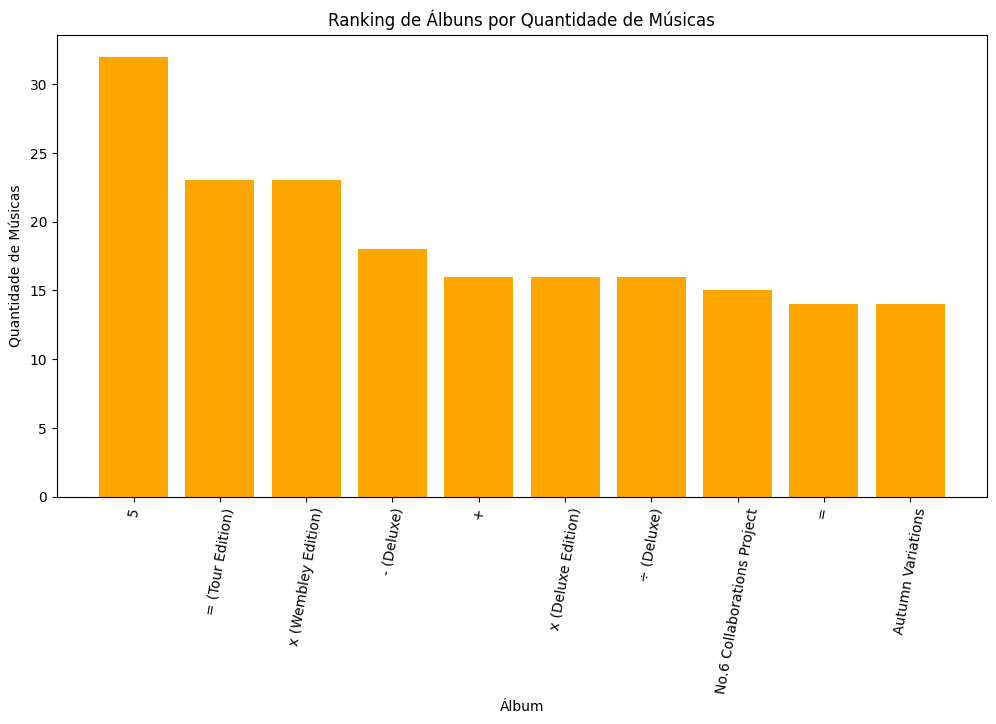

In [38]:
# Criar um DataFrame com a contagem de músicas por álbum
conta_musicas = df_edinho.groupby('album')['name'].count().reset_index()
conta_musicas = conta_musicas.sort_values(by='name', ascending=False).head(10)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(conta_musicas['album'], conta_musicas['name'], color='orange')
plt.xticks(rotation=80)
plt.xlabel('Álbum')
plt.ylabel('Quantidade de Músicas')
plt.title('Ranking de Álbuns por Quantidade de Músicas')
plt.show()

In [41]:
df_ed = df_edinho.copy()

df_ed['release_date'] = pd.to_datetime(df_ed['release_date'])
df_ed['year'] = df_ed['release_date'].dt.year

fig=px.area(df_ed.groupby('year',as_index=False).count().sort_values(by='name',ascending=False).sort_values(by='year'),x='year',y='name',
            markers=True,labels={'name':'Qtd. de Musicas', 'year':'Ano'},color_discrete_sequence=['orange'],title='<b>Lançamentos de músicas por ano')
fig.update_layout(hovermode='x',title_x=0.5, title_font_size=20, title_font_family='Arial',)
fig.show()

In [46]:
album_pop = df_ed.groupby('album')['popularity'].mean().sort_values(ascending=False).round(2)
print(album_pop)

album
÷ (Deluxe)                     69.94
=                              62.93
No.6 Collaborations Project    59.60
- (Deluxe)                     58.22
x (Deluxe Edition)             58.19
+                              56.56
Autumn Variations              50.50
x (Wembley Edition)            38.74
= (Tour Edition)               36.35
Loose Change                   36.00
5                              32.81
No.5 Collaborations Project    32.00
Name: popularity, dtype: float64


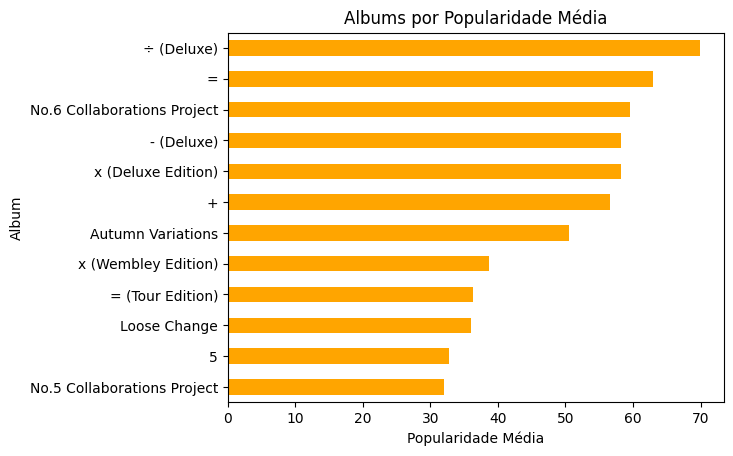

In [43]:
album_pop = album_pop.sort_values(ascending=True)

album_pop.plot(kind='barh', color='orange')
plt.title('Albums por Popularidade Média')
plt.xlabel('Popularidade Média')  
plt.ylabel('Album')  
plt.show()

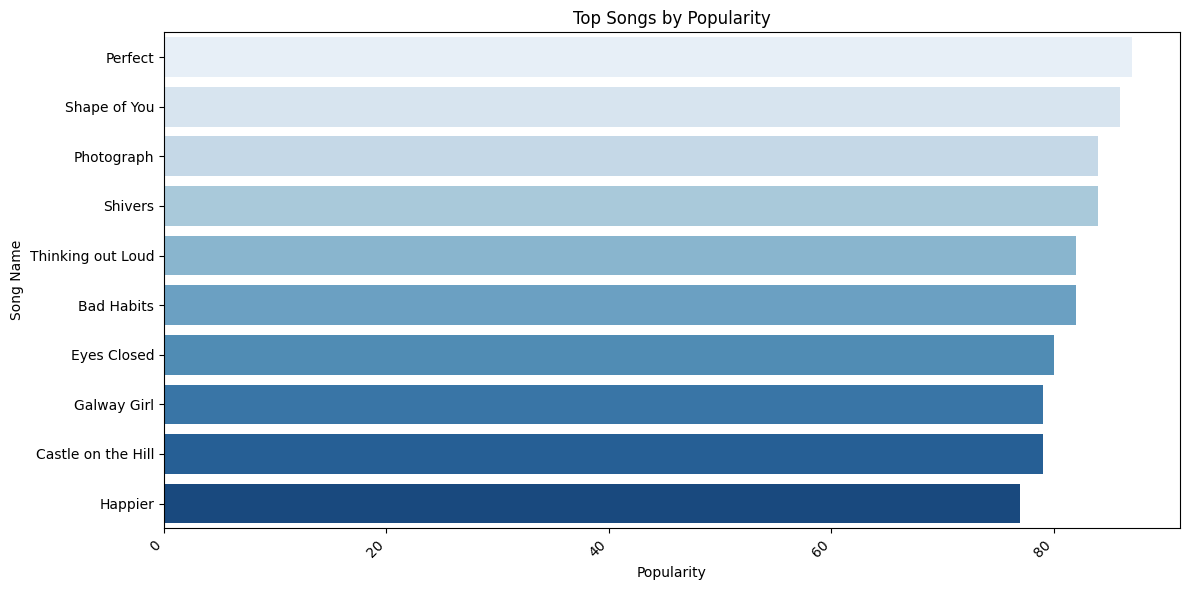

In [51]:
top_musicas = df_ed.sort_values(by='popularity', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='popularity', y='name', data=top_musicas, palette='Blues')  
plt.title('Top Songs by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Song Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

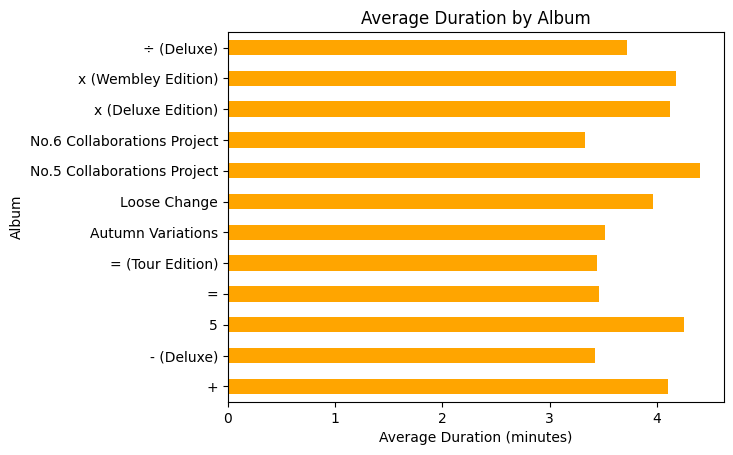

In [55]:
# Convert duration from milliseconds to minutes
df_ed['duration_min'] = df_ed['duration_ms'] / (1000 * 60)

# Average Duration by Album in Minutes
avg_duration_by_album = df_ed.groupby('album')['duration_min'].mean()
avg_duration_by_album.plot(kind='barh', color='orange')
plt.title('Average Duration by Album')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Album')
plt.show()

Text(0.5, 1.0, 'Year of release')

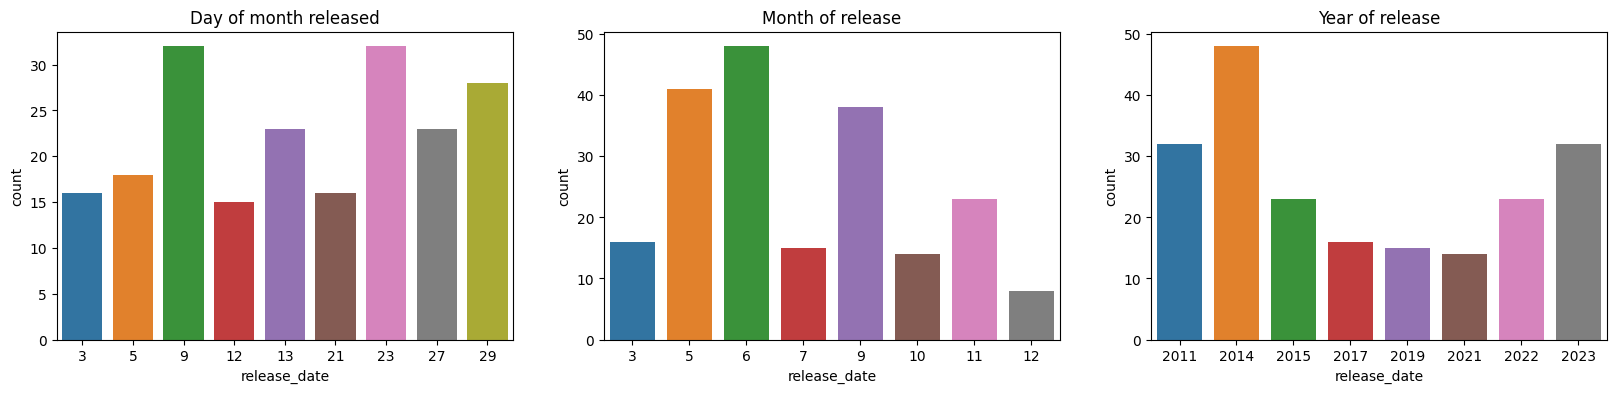

In [56]:
# Create features for each day/month/year each song was released.
month_of_release = df_ed['release_date'].dt.month
day_of_month = df_ed['release_date'].dt.day
year_of_release = df_ed['release_date'].dt.year
# Visualise by release 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4), sharey=False)

sns.countplot(x=day_of_month, ax=axes[0])
sns.countplot(x=month_of_release, ax=axes[1])
sns.countplot(x=year_of_release, ax=axes[2])

axes[0].set_title('Day of month released')
axes[1].set_title('Month of release')
axes[2].set_title('Year of release')

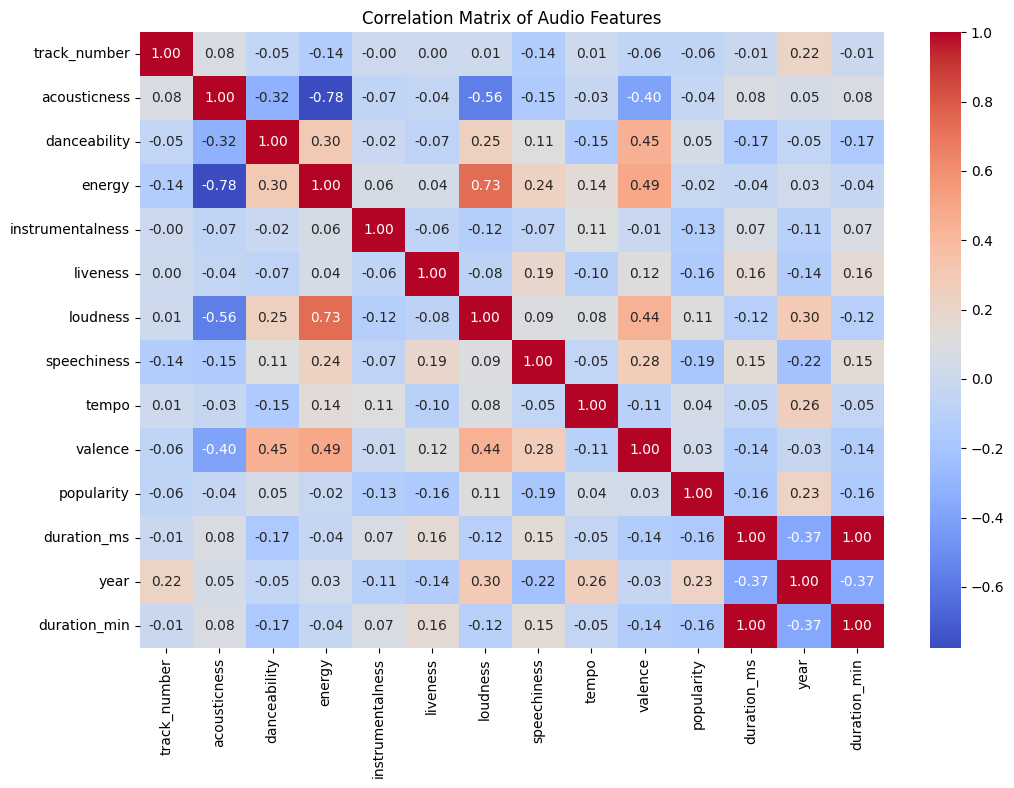

In [57]:
audio_correlation = df_ed.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(audio_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Audio Features')
plt.show()